In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load an image
image = cv2.imread('roads/IMG_20240218_095815.jpg')

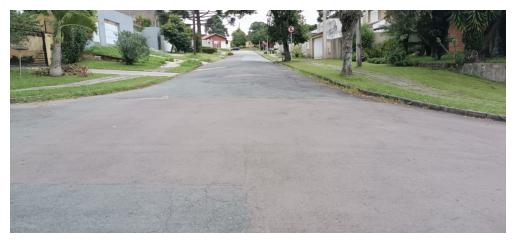

In [3]:
# Display a regular image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

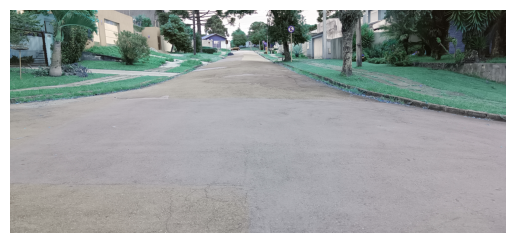

In [4]:
# Without convert with cvtColor
plt.imshow(image)
plt.axis('off')
plt.show()

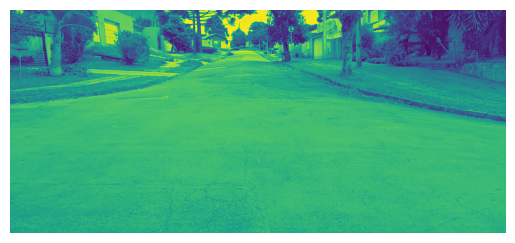

In [5]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.axis('off')
plt.show()

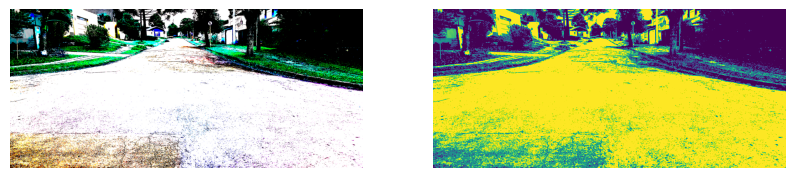

In [6]:
# Aplying threshold
_, image_mask = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
_, asphalt_mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.imshow(image_mask)
plt.axis('off')

plt.subplot(1, 2, 2)  
plt.imshow(asphalt_mask)
plt.axis('off')

plt.show()

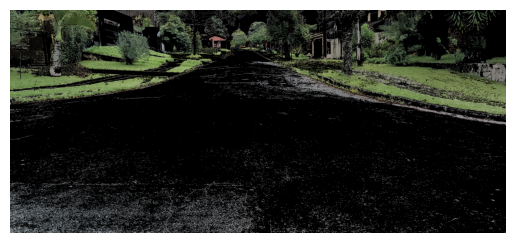

In [7]:
# Converter a imagem para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Definir a faixa de valores para as cores cinzas
cinza_min = 100
cinza_max = 150

# Criar uma máscara que mantém apenas os pixels na faixa de valores cinza
mask_cinza = cv2.inRange(gray, cinza_min, cinza_max)

# Converter a imagem para o espaço de cores HSV
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Definir a faixa de valores de matiz para a cor verde
verde_min = np.array([40, 40, 40])
verde_max = np.array([70, 255, 255])

# Criar uma máscara que mantém apenas os pixels na faixa de valores de matiz verde
mask_verde = cv2.inRange(hsv, verde_min, verde_max)

# Combinar as máscaras para manter apenas os pixels que não são cinza nem verde
mask_final = cv2.bitwise_or(mask_cinza, mask_verde)

# Aplicar a máscara à imagem original para remover as cores cinzas e verdes
result = cv2.bitwise_and(image, image, mask=mask_final)

plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

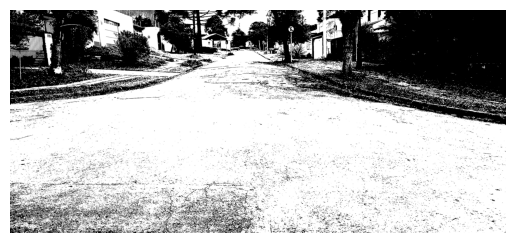

In [8]:
# Converter para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aplicar um limiar para segmentar o asfalto
_, asphalt_mask = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY)

plt.imshow(cv2.cvtColor(asphalt_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

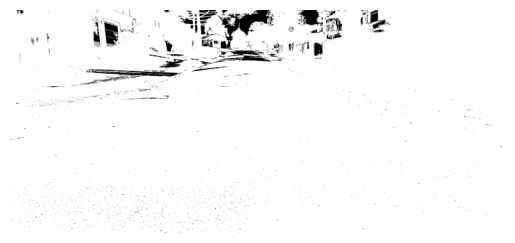

In [9]:
# Aplicar um limiar para segmentar as nuvens
_, cloud_mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

plt.imshow(cv2.cvtColor(cloud_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

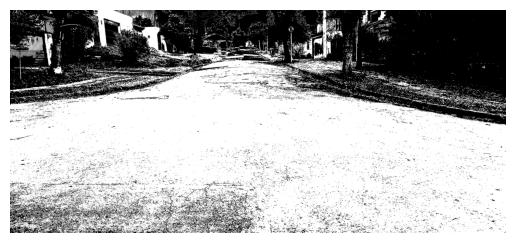

In [10]:
# Criar uma máscara combinada para remover tanto o asfalto quanto as nuvens
combined_mask = asphalt_mask & cloud_mask

plt.imshow(cv2.cvtColor(combined_mask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Preencher as regiões segmentadas com a cor de fundo (branco)
result = cv2.inpaint(image, combined_mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [ ]:
# Exibir a imagem resultante
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()